In [15]:
# !qbraid jobs activate qiskit
!qbraid jobs disable qiskit

ERROR: Invalid argument qiskit

qBraid Quantum Jobs not configured for qiskit environment.


In [16]:
import time

import matplotlib.pyplot as plt
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv
from qiskit import IBMQ


In [17]:
import time
t1=time.time()
import matplotlib.pyplot as plt
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv
from qiskit import IBMQ
print(time.time()-t1)

0.00015306472778320312


In [18]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv
from qiskit import IBMQ

In [19]:

# IBMQ.enable_account(token='961422f04b5e48fa7a2a64b355d58feb83ff03bde8facc8d320b8587a91c46c3ae20d62ab5873375cc74260ddc246924dc6e04bdad12f869b37592f7946f0060', hub='ibm-q-startup', group='qbraid', project='main')
IBMQ.save_account(token='961422f04b5e48fa7a2a64b355d58feb83ff03bde8facc8d320b8587a91c46c3ae20d62ab5873375cc74260ddc246924dc6e04bdad12f869b37592f7946f0060', hub='ibm-q-startup', group='qbraid', project='main',overwrite=True)



In [20]:
IBMQ.providers()

[]

In [7]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider(instance="ibm-q-startup/qbraid/main")

#If you want to retrieve a list of jobs
jobs = provider.backend.jobs(backend_name='ibm_perth')



RequestsApiError: '400 Client Error: Bad Request for url: https://api-staging-1.qbraid.com/api/ibm-routes?route=/version. "If you don\'t specify an idToken, you must specify both an email and refreshToken"'

In [27]:
jobs[0].circuits()

[{'header': {'backend_name': 'ibmq_belem', 'backend_version': '1.2.9'},
  'qobj_id': 'df70df29-39cd-4a99-8f61-6cf1a257708b',
  'experiments': [{'config': {'n_qubits': 5, 'memory_slots': 2},
    'header': {'name': 'circuit-115',
     'creg_sizes': [['c', 2]],
     'qreg_sizes': [['q', 5]],
     'global_phase': 0.7853981633974483,
     'memory_slots': 2,
     'qubit_labels': [['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]],
     'metadata': {},
     'n_qubits': 5,
     'clbit_labels': [['c', 0], ['c', 1]]},
    'instructions': [{'name': 'rz',
      'params': [1.5707963267948966],
      'qubits': [0]},
     {'name': 'sx', 'qubits': [0]},
     {'params': [1.5707963267948966], 'qubits': [0], 'name': 'rz'},
     {'name': 'cx', 'qubits': [0, 1]},
     {'qubits': [0], 'name': 'measure', 'memory': [0]},
     {'name': 'measure', 'memory': [1], 'qubits': [1]}]}],
  'schema_version': '1.3.0',
  'type': 'QASM',
  'config': {'parameter_binds': [],
   'parametric_pulses': ['gaussian',
    'gaussian

In [28]:
backend = provider.get_backend('ibmq_lima')


In [29]:
props = backend.properties()

def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - SX gate error of {3}\n"
          "  - SX gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(1, props)

Qubit 1 has a 
  - T1 time of 112.00365928992207 microseconds
  - T2 time of 156.74024098108464 microseconds
  - SX gate error of 0.0005444390255248943
  - SX gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.127743135642841 GHz


In [30]:
backend.configuration().basis_gates

['cx', 'id', 'rz', 'sx', 'x']

In [31]:
import networkx as nx

G = nx.Graph()


In [32]:
G.add_edges_from([(0, 1),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 1),
 (3, 1),
 (3, 5),
 (4, 5),
 (5, 3),
 (5, 4),
 (5, 6),
 (6, 5)])

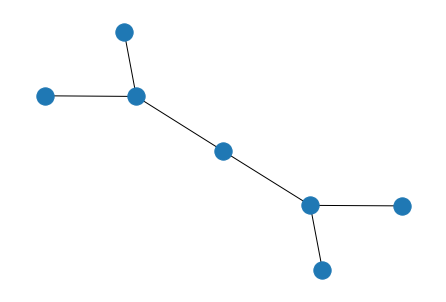

In [33]:
nx.draw(G)

In [34]:
# qubit_lists: list of list of qubit subsets to generate QV circuits
# qubit_lists = [[0,1],[0,1,3],[0,1,2,3]]
qubit_lists = [[0,1,3],[0,1,3,5],[0,1,3,5,7],[0,1,3,5,7,10]]
# ntrials: Number of random circuits to create for each subset
ntrials = 100


In [35]:
import warnings
warnings.filterwarnings('ignore')
qv_circs, qv_circs_nomeas = qv.qv_circuits(qubit_lists, ntrials)


In [36]:
# pass the first trial of the nomeas through the transpiler to illustrate the circuit
# qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['u1','u2','u3','cx'])
qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'])


In [37]:
qv_circs_nomeas[0][0].draw(fold=-1)


global phase: 4.8973
     ┌───────────────────────┐┌────┐┌─────────────────────┐ ┌────┐┌──────────────────────┐            ┌──────────┐      ┌────┐┌──────────────────────┐┌────┐      ┌──────────┐                 ┌──────────┐      ┌────┐    ┌─────────────┐     ┌────┐                            ┌─────────────┐┌────┐┌─────────────┐ ┌────┐┌─────────────┐ ┌───┐┌───────────────────────┐┌────┐┌──────────────────────┐┌────┐┌──────────────────────┐┌───┐┌──────────────────────┐┌────┐┌──────────────────────┐┌────┐┌─────────────────────┐┌───┐       ┌───────────┐       ┌────┐    ┌─────────────┐     ┌────┐    ┌──────────────┐    ┌───┐┌────────────────────────┐┌────┐┌──────────────────────┐┌────┐┌──────────────────────┐┌───┐┌──────────────────────┐┌────┐┌──────────────────────┐┌────┐┌─────────────────────┐┌───┐┌───────────────────────┐ ┌────┐┌──────────────────────┐┌────┐┌──────────────────────┐
q_0: ┤ Rz(-2.80618002440565) ├┤ √X ├┤ Rz(5.1292882192747) ├─┤ √X ├┤ Rz(6.34691885803811) ├──■─────────┤ Rz(-π/2) ├──────┤ √X ├┤ Rz(3.74978240731177) ├┤ √X ├──────┤ Rz(5π/2) ├────────■────────┤ Rz(-π/2) ├──────┤ √X ├────┤ Rz(-3.0133) ├─────┤ √X ├─────────────────────────■──┤ Rz(-2.1699) ├┤ √X ├┤ Rz(-1.7995) ├─┤ √X ├┤ Rz(0.15881) ├─┤ X ├┤ Rz(-1.15555294979725) ├┤ √X ├┤ Rz(3.91559856164055) ├┤ √X ├┤ Rz(9.11936242195573) ├┤ X ├┤ Rz(2.60392723686644) ├┤ √X ├┤ Rz(5.23241481292213) ├┤ √X ├┤ Rz(6.9779421007214) ├┤ X ├───────┤ Rz(1.854) ├───────┤ √X ├────┤ Rz(-1.6665) ├─────┤ √X ├────┤ Rz(-0.53147) ├────┤ X ├┤ Rz(-0.796208024586285) ├┤ √X ├┤ Rz(4.03820326397199) ├┤ √X ├┤ Rz(8.87637583310294) ├┤ X ├┤ Rz(2.60392723686644) ├┤ √X ├┤ Rz(5.23241481292213) ├┤ √X ├┤ Rz(6.9779421007214) ├┤ X ├┤ Rz(0.151034258839127) ├─┤ √X ├┤ Rz(4.16697143428694) ├┤ √X ├┤ Rz(6.32917904499945) ├
     └┬──────────────────────┤├────┤├─────────────────────┴┐├────┤├──────────────────────┤  │         └──────────┘      └────┘└──────────────────────┘└────┘      └──────────┘        │        └──────────┘      └────┘    └─────────────┘     └────┘                         │  └─────────────┘└────┘└─────────────┘ └────┘└─────────────┘ └─┬─┘└───────────────────────┘└────┘└──────────────────────┘└────┘└──────────────────────┘└─┬─┘└──────────────────────┘└────┘└──────────────────────┘└────┘└─────────────────────┘└─┬─┘       └───────────┘       └────┘    └─────────────┘     └────┘    └──────────────┘    └─┬─┘└──────┬──────────┬──────┘├────┤├──────────────────────┤├────┤└─────┬──────────┬─────┘└─┬─┘└─────┬──────────┬─────┘├────┤└────┬────────────┬────┘├────┤└─────────────────────┘└─┬─┘├───────────────────────┴┐├────┤├──────────────────────┤├────┤├──────────────────────┤
q_1: ─┤ Rz(2.61077103315483) ├┤ √X ├┤ Rz(4.52099519504962) ├┤ √X ├┤ Rz(7.25344342203017) ├──┼─────────────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────■─────────┤ Rz(-π/2) ├───────┤ √X ├┤ Rz(4.03907632704927) ├┤ √X ├──────┤ Rz(5π/2) ├────────■────────┤ Rz(-π/2) ├──────┤ √X ├─────┤ Rz(2.6131) ├─────┤ √X ├─────────────────────────■──┤ Rz(-0.756446404810798) ├┤ √X ├┤ Rz(4.60689346538132) ├┤ √X ├┤ Rz(10.3545479982924) ├
      ├──────────────────────┤├────┤├──────────────────────┤├────┤├──────────────────────┤┌─┴─┐┌───────────────────────┐┌────┐┌──────────────────────┐┌────┐┌──────────────────────┐┌─┴─┐┌──────────────────────┐┌────┐┌──────────────────────┐┌────┐┌─────────────────────┐┌─┴─┐┌─────────────┐┌────┐┌──────────────┐┌────┐┌──────────────┐  │         ┌──────────┐      ┌────┐┌──────────────────────┐┌────┐      ┌──────────┐        │        ┌──────────┐      ┌────┐    ┌─────────────┐     ┌────┐

In [38]:
sv_sim = qiskit.Aer.get_backend('aer_simulator')
ideal_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    for qc in qv_circs_nomeas[trial]:
        qc.save_statevector()
    result = qiskit.execute(qv_circs_nomeas[trial], backend=sv_sim).result()
    ideal_results.append(result)
    print(f'Simulated trial {trial+1}/{ntrials}')


Simulated trial 100/100


In [39]:
qv_fitter = qv.QVFitter(qubit_lists=qubit_lists)
qv_fitter.add_statevectors(ideal_results)


In [40]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_outputs['qv_depth_'+str(l)+'_trial_0'])


qv_depth_3_trial_0: ['000', '001', '011', '111']
qv_depth_4_trial_0: ['0011', '0101', '0110', '0111', '1010', '1100', '1101', '1111']
qv_depth_5_trial_0: ['00000', '00010', '00011', '00100', '00101', '00111', '01001', '01011', '01111', '10001', '10010', '10111', '11011', '11101', '11110', '11111']
qv_depth_6_trial_0: ['000011', '000100', '000101', '000110', '001101', '010000', '010001', '010100', '010110', '011001', '011100', '011101', '011110', '100011', '100111', '101000', '101001', '101010', '101011', '101100', '101101', '101110', '101111', '110000', '110010', '110011', '110100', '110101', '110111', '111010', '111011', '111101']


In [41]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_prob_ideal['qv_depth_'+str(l)+'_trial_0'])


qv_depth_3_trial_0: 0.7926315378902514
qv_depth_4_trial_0: 0.8112022428872226
qv_depth_5_trial_0: 0.8672385208414432
qv_depth_6_trial_0: 0.8596064972566452


In [42]:
# Quantum Volume with noisy simulator

noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')


In [43]:
aer_sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1024
exp_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    t_qcs = transpile(qv_circs[trial], basis_gates=basis_gates, optimization_level=3)
    qobj = assemble(t_qcs)
    result = aer_sim.run(qobj, noise_model=noise_model, max_parallel_experiments=0).result()
    exp_results.append(result)
    print(f'Completed trial {trial+1}/{ntrials}')


Completed trial 100/100


In [70]:
aer_sim = provider.get_backend('ibmq_lima')
basis_gates = ['id', 'rz', 'sx', 'x', 'cx', 'reset'] # use U,CX for now

shots = 1024
exp_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    t_qcs = transpile(qv_circs[trial], basis_gates=basis_gates, backend=aer_sim, optimization_level=0)
    qobj = assemble(t_qcs)
    result = aer_sim.run(qobj, max_parallel_experiments=0).result()
    exp_results.append(result)
    print(f'Completed trial {trial+1}/{ntrials}')


Completed trial 10/10


qv_depth_3_trial_0: 757
qv_depth_4_trial_0: 685
qv_depth_5_trial_0: 792
qv_depth_6_trial_0: 656


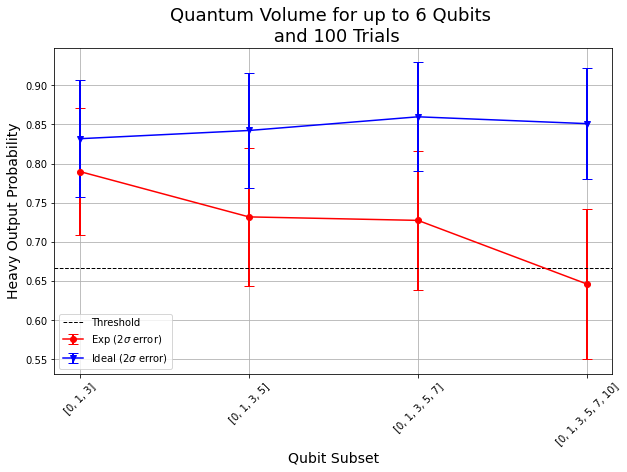

In [44]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()


# IonQ Quantum Volume

In [46]:
# from qbraid import device_wrapper
# get_devices()
qbraid_id = 'aws_sv_sim'  # as an example

# qdevice = device_wrapper(qbraid_id)


In [47]:
#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv
import qiskit
from qiskit import assemble, transpile
from qiskit import IBMQ
# general imports
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask
from qbraid import circuit_wrapper
from qbraid import device_wrapper
from qbraid import get_devices


from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error


# qubit_lists: list of list of qubit subsets to generate QV circuits
qubit_lists = [[0,1],[0,1,2],[0,1,3,5],]
# qubit_lists = [[0,1,3],[0,1,3,5],[0,1,3,5,7],[0,1,3,5,7,10]]
# ntrials: Number of random circuits to create for each subset
ntrials = 5


ModuleNotFoundError: No module named 'braket.circuits'

In [18]:
import warnings
warnings.filterwarnings('ignore')
qv_circs, qv_circs_nomeas = qv.qv_circuits(qubit_lists, ntrials)


In [94]:
# pass the first trial of the nomeas through the transpiler to illustrate the circuit
# qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['u1','u2','u3','cx'])
qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cx', 'swap','s', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'id'])
# qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cx', 'swap','s', 'si', 't', 'ti', 'id'])








In [95]:
qv_circs_nomeas[2][1].draw(fold=-1)


┌───────────────────────────┐
q_0: ┤0                          ├
     │                           │
q_1: ┤1 quantum_volume_[3,3,954] ├
     │                           │
q_2: ┤2                          ├
     └───────────────────────────┘

In [96]:
sv_sim = qiskit.Aer.get_backend('aer_simulator')
basis_gates = ['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cx', 'swap','s', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'id'] # use U,CX for now
ideal_results = []
all_trials = []
for trial in range(ntrials):
    clear_output(wait=True)
    t_qcs = transpile(qv_circs_nomeas[trial], basis_gates=basis_gates, optimization_level=0)
    tasks = []
    for qk_circ in t_qcs:
        braket_circ = circuit_wrapper(qk_circ).transpile('braket')

        device = LocalSimulator()

        # my_bucket = f"amazon-braket-Your-Bucket-Name" # the name of the bucket
        # my_prefix = "Your-Folder-Name" # the name of the folder in the bucket
        # s3_folder = (my_bucket, my_prefix)
        # device = AwsDevice("arn:aws:braket:::device/qpu/ionq/ionQdevice")
        braket_task = device.run(braket_circ,shots=1024).result()

        # braket_task = device.run(braket_circ, s3_folder, shots=100, poll_timeout_seconds=5*24*60*60)
        # braket_task = device.run(braket_circ,shots=1000)
        # counts = braket_result.measurement_counts
        tasks.append(braket_task)
        # print(braket_task.id)
    all_trials.append(tasks)
        

    for qc in qv_circs_nomeas[trial]:
        qc.save_statevector()

    result = qiskit.execute(qv_circs_nomeas[trial], backend=sv_sim).result()
    ideal_results.append(result)
    print(f'Simulated trial {trial+1}/{ntrials}')


Simulated trial 5/5


In [97]:
# print(all_trials)
# braket_task.measurement_counts
data_for_qiskit = []
for trial in all_trials:
    b_results = []
    for braket_result in trial:
        data = {}
        for k,v in braket_result.measurement_counts.items():
            data[hex(int(k[::-1],16))]=v
            # print(k)
        b_results.append(data)
    data_for_qiskit.append(b_results)

In [98]:
data_for_qiskit[0][0]

{'0x11': 245, '0x0': 229, '0x10': 155, '0x1': 395}

In [99]:
all_trials[0][0].measurement_counts

Counter({'11': 245, '00': 229, '01': 155, '10': 395})

In [100]:
qv_fitter = qv.QVFitter(qubit_lists=qubit_lists)
qv_fitter.add_statevectors(ideal_results)


In [101]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_outputs['qv_depth_'+str(l)+'_trial_0'])


qv_depth_2_trial_0: ['00', '01']
qv_depth_3_trial_0: ['000', '010', '011', '110']
qv_depth_4_trial_0: ['0010', '0011', '0100', '0101', '0111', '1001', '1010', '1111']


In [102]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_prob_ideal['qv_depth_'+str(l)+'_trial_0'])


qv_depth_2_trial_0: 0.6152495416262228
qv_depth_3_trial_0: 0.8044942061325417
qv_depth_4_trial_0: 0.8583784774830869


In [103]:
# Quantum Volume with noisy simulator

noise_model = NoiseModel()
p1Q = 0.002
p1Q = 0.00000002
p2Q = 0.02
p2Q = 0.0000002
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')


In [104]:
aer_sim = qiskit.Aer.get_backend('aer_simulator')
# basis_gates = ['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cnot', 's', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'swap', 'i'] # use U,CX for now
basis_gates = ['x', 'y', 'z', 'rx', 'ry', 'rz', 'h', 'cx', 'swap','s', 'si', 't', 'ti', 'v', 'vi', 'xx', 'yy', 'zz', 'id'] # use U,CX for now
shots = 1024
exp_results = []
for trial in range(ntrials):
    clear_output(wait=True)
    t_qcs = qv_circs[trial]
    t_qcs = transpile(qv_circs[trial], basis_gates=basis_gates, optimization_level=0)

    qobj = assemble(t_qcs)
    result = aer_sim.run(qobj, noise_model=noise_model, max_parallel_experiments=0).result()
    for i in range(len(result.results)):
        result.results[i].data.counts = data_for_qiskit[trial][i]
    exp_results.append(result)
    print(f'Completed trial {trial+1}/{ntrials}')



Completed trial 5/5


qv_depth_2_trial_0: 624
qv_depth_3_trial_0: 268
qv_depth_4_trial_0: 0


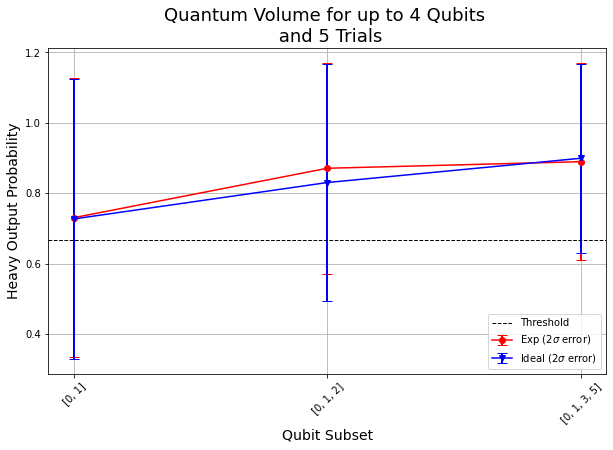

In [105]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()


In [90]:
# print(data_for_qiskit[0])
# print(data_for_qiskit[0][1])
print(data_for_qiskit[0][0])
# data_for_qiskit[0][1]
# data_for_qiskit[0][2]

{'0x0': 692, '0x11': 196, '0x10': 100, '0x1': 36}


In [91]:
exp_results[0].results[0].data.to_dict()


{'counts': {'0x1': 42, '0x2': 100, '0x0': 681, '0x3': 201}}

In [32]:
exp_results[0].get_counts()

[{'01': 1774, '10': 135, '00': 181},
 {'110': 268, '000': 317, '101': 810, '001': 408},
 {'1000': 89,
  '0000': 247,
  '1101': 230,
  '1100': 892,
  '1111': 301,
  '1011': 53,
  '1010': 52,
  '0001': 67}]

In [63]:
# print(result)
qv_fitter.add_data(exp_results)
# qv_fitter._circ_counts

ntrials_circ = int(result.results[0].header.name.split('_')[-1])
# qv_circs[0]
# print(result.get_counts())
# print(result.to_dict()['results'][1]['data']['counts'])
# print(result.results[0].data.counts.keys())
# print(result.results[0].data.to_dict())
# print(result.results[1].data.to_dict())
# print(result.results[2].data.to_dict())
# print(result.results[3].data.to_dict())
print(len(exp_results))
print(len(result.results))
result_counts = result.results[0].data.counts
print(result_counts)

3
4
{'0x0': 32, '0x3': 289, '0x7': 243, '0x5': 119, '0x1': 186, '0x6': 34, '0x4': 54, '0x2': 67}


In [64]:
# int('0x3')
bstr = '01'
number, pad, rjust, size, kind = 0x3, '0', '>', 4, 'b'
print(f'{number:{pad}{rjust}{size}{kind}}')
hex(int(bstr))
# hex(int('0x3'))
for k,v in result_counts.items():
    # print(type(int(k,16)))
    # break
    print(f'{int(k,16):{pad}{rjust}{size}{kind}}', result_counts[k])

0011
0000 32
0011 289
0111 243
0101 119
0001 186
0110 34
0100 54
0010 67


In [65]:
a = 0x3
print(type(a))

<class 'int'>


In [66]:
# print(hex(int('11')))

# f'{int(b'11', 2):x}'
# as

In [62]:
print(type(qv_circs_nomeas[1][0]))

<class 'qiskit.circuit.library.quantum_volume.QuantumVolume'>


In [ ]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()


In [1]:
from braket.strawberryfields_plugin import BraketEngine

eng = BraketEngine("arn:aws:braket:us-east-1::device/qpu/xanadu/Borealis")
device = eng.device

ModuleNotFoundError: No module named 'braket.strawberryfields_plugin'

In [2]:
# Needed for functions
import numpy as np
import time
from copy import deepcopy

# Import Qiskit classes
import qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.providers.aer import noise
from qiskit.compiler import assemble

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

# Auxiliary methods
from qiskit.quantum_info import Choi, Kraus
from qiskit.extensions import HGate, XGate

/tmp/ipykernel_150/3637104791.py:14: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


In [3]:
# Create the expected statevector
q2 = QuantumRegister(2)
bell = QuantumCircuit(q2)
bell.h(q2[0])
bell.cx(q2[0], q2[1])
print(bell)

target_state_bell = qi.Statevector.from_instruction(bell)
print(target_state_bell)

      ┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [4]:
# Create the actual circuit
q2 = QuantumRegister(6)
bell = QuantumCircuit(q2)
bell.h(q2[3])
bell.cx(q2[3], q2[5])
print(bell)



                
q1_0: ──────────
                
q1_1: ──────────
                
q1_2: ──────────
      ┌───┐     
q1_3: ┤ H ├──■──
      └───┘  │  
q1_4: ───────┼──
           ┌─┴─┐
q1_5: ─────┤ X ├
           └───┘


In [5]:


# Generate circuits and run on simulator
t = time.time()

# Generate the state tomography circuits.
qst_bell = state_tomography_circuits(bell, [q2[3], q2[5]])

# Execute
job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)
print('Time taken:', time.time() - t)

# Fit result
tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)



Time taken: 0.24877452850341797


In [6]:


# Perform the tomography fit
# which outputs a density matrix
rho_fit_bell = tomo_fitter_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_fit_bell, target_state_bell)
print('State Fidelity: F = {:.5f}'.format(F_bell))



State Fidelity: F = 0.99822


In [7]:


#Add measurement noise
noise_model = noise.NoiseModel()
for qubit in range(6):
    read_err = noise.errors.readout_error.ReadoutError([[0.75, 0.25],[0.1,0.9]])
    noise_model.add_readout_error(read_err,[qubit])

#generate the calibration circuits
meas_calibs, state_labels = mc.complete_meas_cal(qubit_list=[3,5])

backend = Aer.get_backend('qasm_simulator')
job_cal = qiskit.execute(meas_calibs, backend=backend, shots=15000, noise_model=noise_model)
job_tomo = qiskit.execute(qst_bell, backend=backend, shots=15000, noise_model=noise_model)

meas_fitter = mc.CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomographyFitter(job_tomo.result(), qst_bell)

#no correction
rho_bell = tomo_bell.fit(method='lstsq')
F_bell = qi.state_fidelity(rho_bell, target_state_bell)
print('State fidelity (no correction): F = {:.5f}'.format(F_bell))

#correct data
correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
tomo_bell_mit = StateTomographyFitter(correct_tomo_results, qst_bell)
rho_fit_bell_mit = tomo_bell_mit.fit(method='lstsq')
F_bell_mit = qi.state_fidelity(rho_fit_bell_mit, target_state_bell)
print('State fidelity (w/ correction): F = {:.5f}'.format(F_bell_mit))



State fidelity (no correction): F = 0.57862
State fidelity (w/ correction): F = 0.99606


In [8]:
# Process tomography of a Hadamard gate
q = QuantumRegister(1)
circ = QuantumCircuit(q)
circ.h(q[0])

# Get the ideal unitary operator
target_unitary = qi.Operator(circ)

# Generate process tomography circuits and run on qasm simulator
qpt_circs = process_tomography_circuits(circ, q)
job = qiskit.execute(qpt_circs, Aer.get_backend('qasm_simulator'), shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 4000},
 (('Zp',), ('Y',)): {'1': 1954, '0': 2046},
 (('Zp',), ('Z',)): {'0': 1988, '1': 2012},
 (('Zm',), ('X',)): {'1': 4000},
 (('Zm',), ('Y',)): {'1': 2022, '0': 1978},
 (('Zm',), ('Z',)): {'1': 2047, '0': 1953},
 (('Xp',), ('X',)): {'0': 1980, '1': 2020},
 (('Xp',), ('Y',)): {'1': 1954, '0': 2046},
 (('Xp',), ('Z',)): {'0': 4000},
 (('Yp',), ('X',)): {'1': 2012, '0': 1988},
 (('Yp',), ('Y',)): {'1': 4000},
 (('Yp',), ('Z',)): {'1': 1962, '0': 2038}}

In [9]:
# Tomographic reconstruction
t = time.time()
choi_fit_lstsq = qpt_tomo.fit(method='lstsq')

print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit_lstsq, target=target_unitary)))

Fit time: 0.008121490478515625
Average gate fidelity: F = 0.99965


In [10]:
# Process tomography of a Hadamard gate
q = QuantumRegister(2)
circ = QuantumCircuit(q)
circ.swap(q[0], q[1])

# Generate process tomography circuits and run on qasm simulator
# We use the optional prepared_qubits kwarg to specify that the prepared qubit was different to measured qubit
qpt_circs = process_tomography_circuits(circ, q[1], prepared_qubits=q[0])
job = qiskit.execute(qpt_circs, Aer.get_backend('qasm_simulator'), shots=2000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'1': 983, '0': 1017},
 (('Zp',), ('Y',)): {'0': 983, '1': 1017},
 (('Zp',), ('Z',)): {'0': 2000},
 (('Zm',), ('X',)): {'0': 941, '1': 1059},
 (('Zm',), ('Y',)): {'1': 982, '0': 1018},
 (('Zm',), ('Z',)): {'1': 2000},
 (('Xp',), ('X',)): {'0': 2000},
 (('Xp',), ('Y',)): {'0': 993, '1': 1007},
 (('Xp',), ('Z',)): {'0': 989, '1': 1011},
 (('Yp',), ('X',)): {'1': 1014, '0': 986},
 (('Yp',), ('Y',)): {'0': 2000},
 (('Yp',), ('Z',)): {'0': 1020, '1': 980}}

In [11]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))


Fit time: 0.0062541961669921875
Average gate fidelity: F = 0.99862
